In [7]:
import os
import pandas as pd
from tqdm import tqdm
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

sns.set_theme(style="whitegrid")

In [11]:
G = nx.read_pajek('../networks/python-dependencies.net')

In [3]:
print("Number of nodes: ", G.number_of_nodes())
print("Number of edges: ", G.number_of_edges())
print("Number of connected components: ", nx.number_weakly_connected_components(G))

Number of nodes:  532386
Number of edges:  1650654
Number of connected components:  179304


In [10]:
# largest connected component
largest_cc = max(nx.weakly_connected_components(G), key=len)
print("Number of nodes in largest connected component: ", len(largest_cc))

Number of nodes in largest connected component:  349793


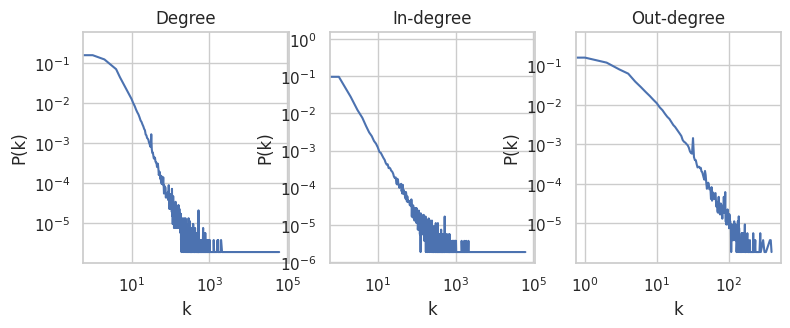

In [8]:
def get_k_distribution(G, fn):
    n = len(G)
    return {k: v / n for k, v in Counter([k for _, k in fn(G)]).items()}


ks = {
    "Degree": get_k_distribution(G, lambda g: g.degree()),
    "In-degree": get_k_distribution(G, lambda g: g.in_degree()),
    "Out-degree": get_k_distribution(G, lambda g: g.out_degree()),
}

fig, axs = plt.subplots(1, 3, figsize=(9, 3))

for i, (k, dist) in enumerate(ks.items()):
    sns.lineplot(x=list(dist.keys()), y=list(dist.values()), ax=axs[i])

    axs[i].set_title(k)
    axs[i].set_xscale("log")
    axs[i].set_yscale("log")
    axs[i].set_xlabel("k")
    axs[i].set_ylabel("P(k)")

plt.show()